# Data Cleaning with Pandas

In [1]:
import pandas as pd

## Catch-Up from Yesterday

## Reshaping a DataFrame

### `.pivot()` and `.pivot_table()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [2]:
import pandas as pd
uci = pd.read_csv('heart.csv')

In [3]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
uci.pivot(values = 'sex', columns = 'target').head()

target,0,1
0,NaN,1.0
1,NaN,1.0
2,NaN,0.0
3,NaN,1.0
4,NaN,0.0


In [5]:
uci.pivot_table(values = 'chol', index = 'sex', columns = 'target', aggfunc = 'mean')

target,0,1
sex,,
0,274.958333,256.750000
1,246.061404,230.989247


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [6]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [7]:
toy1.join(toy2.set_index('age'),
          on = 'age',
          lsuffix = '_1',
          rsuffix = '_2').head()

,age,HP_1,HP_2
0,63,142,100
1,33,47,200


### `.merge()`

In [8]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [9]:
states = pd.read_csv('states.csv', index_col = 0)
states

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [10]:
ds_chars.merge(states,
               left_on='home_state',
               right_on = 'state',
               how = 'inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [11]:
pd.concat([ds_chars, states], axis=1)

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,TX,alamo,Austin
2,alan,170,TX,DC,district,Washington
3,alison,300,DC,OH,buckeye,Columbus
4,rachel,200,TX,OR,beaver,Salem


### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [12]:
ds_chars.head()

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [13]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

,name,variable,value
0,greg,HP,200
1,miles,HP,200
2,alan,HP,170
3,alison,HP,300
4,rachel,HP,200
5,greg,home_state,WA
6,miles,home_state,WA
7,alan,home_state,TX
8,alison,home_state,DC
9,rachel,home_state,TX


## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. I will send those zipped files to you in Slack.


Note that there are spaces in the file name. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the file that you want to unzip.

In [14]:
sales_df = pd.read_csv('data/Real Property Sales.zip')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [15]:
sales_df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [16]:
pd.set_option("display.max_columns",100)

In [17]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 62.5+ MB


In [19]:
sales_df['DocumentDate']

0          08/21/2014
1          07/09/1991
2          10/11/2014
3          01/04/2013
4          04/20/1989
5          07/07/2003
6          04/25/2001
7          04/25/2001
8          04/25/2001
9          04/25/2001
10         04/25/2001
11         04/25/2001
12         04/25/2001
13         04/25/2001
14         04/25/2001
15         04/25/2001
16         04/25/2001
17         04/25/2001
18         04/25/2001
19         04/25/2001
20         04/25/2001
21         04/25/2001
22         04/25/2001
23         04/02/2014
24         03/03/2006
25         06/07/2012
26         03/06/1998
27         03/28/2008
28         07/23/2000
29         07/14/2015
              ...    
2049186    03/13/1991
2049187    06/17/2016
2049188    04/26/1996
2049189    03/13/2002
2049190    12/05/1996
2049191    06/11/2001
2049192    08/08/2016
2049193    11/25/1996
2049194    08/09/2011
2049195    06/15/1993
2049196    10/12/1994
2049197    02/25/1994
2049198    02/13/2013
2049199    02/13/2007
2049200   

In [20]:
bldg_df = pd.read_csv('data/Residential Building.zip')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [21]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [22]:
bldg_df.head().T

,0,1,2,3,4
Major,4100,4100,4100,4100,4100
Minor,14,14,165,175,406
BldgNbr,1,2,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,3251 S 148TH ST 98168,3251 S 148TH ST 98168,4001 S 148TH ST 98168,4039 S 148TH ST 98168,15051 MILITARY RD S 98188
BuildingNumber,3251,3251,4001,4039,15051
Fraction,,,,,
DirectionPrefix,S,S,S,S,
StreetName,148TH,148TH,148TH,148TH,MILITARY
StreetType,ST,ST,ST,ST,RD


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [23]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [24]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514381 entries, 0 to 514380
Data columns (total 4 columns):
Major            514381 non-null int64
Minor            514381 non-null int64
SqFtTotLiving    514381 non-null int64
ZipCode          468541 non-null object
dtypes: int64(3), object(1)
memory usage: 15.7+ MB


In [25]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [26]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [27]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [28]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 4 columns):
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.5+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [29]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [30]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 62.5+ MB


Now, let's try our join again.

In [31]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [32]:
sales_data

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092
5,423943.0,50.0,05/14/1998,0,960,98092
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092
8,423943.0,50.0,05/21/1998,0,960,98092
9,423943.0,50.0,01/10/2001,0,960,98092


In [33]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464608 entries, 0 to 1464607
Data columns (total 6 columns):
Major            1464608 non-null float64
Minor            1464608 non-null float64
DocumentDate     1464608 non-null object
SalePrice        1464608 non-null int64
SqFtTotLiving    1464608 non-null int64
ZipCode          1341848 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 78.2+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [34]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
100,858140.0,376.0,05/22/2012,0,900,NaN
101,858140.0,376.0,11/28/2017,0,900,NaN
158,334330.0,1343.0,05/30/2006,0,4600,NaN
159,334330.0,1343.0,05/30/2006,0,4600,NaN
160,334330.0,1343.0,11/26/2001,0,4600,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

*Note:* we can use [Boolean Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) to select all the rows where there are no missing zip codes

In [35]:
sales_data2 = sales_data.loc[~(sales_data['ZipCode'].isna())]
sales_data2.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


### An alternative method to drop missing is `.dropna()`

In [36]:
sales_data3=sales_data.dropna()
sales_data3.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

In [37]:
EDA1 = pd.DataFrame(sales_data['SalePrice'].value_counts())
EDA1.index.name = 'SalePrice'
EDA1.columns = ['FrequencyofSalePrice']
EDA1

,FrequencyofSalePrice
SalePrice,
0,496691
250000,5085
300000,5052
350000,4867
200000,4399
325000,4250
400000,4249
225000,4244
150000,4124


In [93]:
EDA1.sort_values(by=['SalePrice'])

,FrequencyofSalePrice
SalePrice,
-600,1
-400,1
-300,2
-100,1
0,496691
1,12
2,53
3,5
4,1


In [ ]:
(sales_data.loc[sales_data['SalePrice'] < 80000]['SalePrice']).value_counts(bins=5)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(sales_data.loc[sales_data['SalePrice'] < 100000]['SalePrice']).plot(kind='hist')

In [40]:
sales_data4 = sales_data2.loc[(sales_data2['SalePrice'] > 0) 
                              & (sales_data2['SqFtTotLiving'] > 0)]
sales_data4.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,880984.000000,880984.000000,8.809840e+05,880984.000000
mean,452319.360546,1491.653743,4.366635e+05,2108.417233
std,286343.292806,2771.062609,8.848441e+05,951.652716
min,40.000000,1.000000,1.000000e+00,1.000000
25%,206110.000000,115.000000,1.655000e+05,1450.000000
50%,388580.000000,320.000000,2.800000e+05,1950.000000
75%,723750.000000,960.000000,4.600000e+05,2570.000000
max,990600.000000,9689.000000,3.750000e+07,48160.000000


### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [ ]:
sales_data4['ZipCode'].unique()

In [ ]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

### 3. Add a column for PricePerSqFt



In [ ]:
sales_data4['PricePerSqFt'] = sales_data4['SalePrice']/sales_data4['SqFtTotLiving']
sales_data4['SalePrice','SqFtTotLiving','PricePerSqFt']

### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!

# Data Cleaning

In [84]:
sales_data4

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,SalePriceOutlier
0,138860.0,110.0,08/21/2014,245000,1490,98002,False
1,138860.0,110.0,06/12/1989,109300,1490,98002,False
2,138860.0,110.0,01/16/2005,14684,1490,98002,False
6,423943.0,50.0,07/15/1999,96000,960,98092,False
7,423943.0,50.0,01/08/2001,127500,960,98092,False
11,403700.0,715.0,07/03/2013,464500,1780,98008,False
12,403700.0,715.0,02/21/2013,357000,1780,98008,False
13,403700.0,715.0,10/13/1995,142000,1780,98008,False
14,403700.0,715.0,02/22/2007,528000,1780,98008,False
16,98400.0,380.0,03/23/1994,139950,2050,98058,False


In [85]:
sales_data4['SalePrice'].describe()

count    8.809840e+05
mean     4.366635e+05
std      8.848441e+05
min      1.000000e+00
25%      1.655000e+05
50%      2.800000e+05
75%      4.600000e+05
max      3.750000e+07
Name: SalePrice, dtype: float64

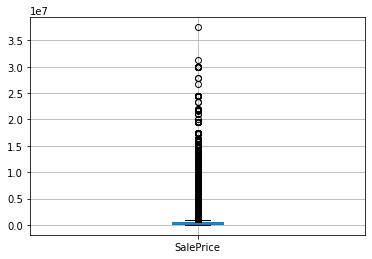

In [87]:
sales_data4.boxplot(column='SalePrice')

In [89]:
import seaborn as sns

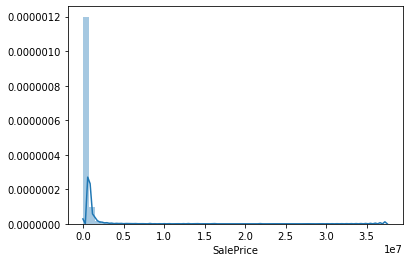

In [90]:
sns.distplot(sales_data4['SalePrice'])

In [42]:
from scipy import stats
import numpy as np

In [ ]:
#sales_data4[(np.abs(stats.zscore(sales_data4)) < 3).all(axis=1)]

In [94]:
sales_data4['SalePriceOutlier'] = (np.abs(stats.zscore(sales_data4['SalePrice'])) >= 3)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### What if we assume the mean is $612,400 per Zillow?

In [95]:
ZillowMean = 612400

In [105]:
ZillowSTD = (sales_data4['SalePrice'].map(lambda x: ((abs(x - ZillowMean)**2))).mean())**(1/2)
ZillowSTD

902126.1350746686

In [106]:
sales_data4['SalePriceOutlier2'] = np.abs((sales_data4['SalePrice']-ZillowMean)/ZillowSTD) >= 3

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
sales_data4.loc[sales_data4['SalePriceOutlier2'] != sales_data4['SalePriceOutlier']][['SalePrice','SalePriceOutlier','SalePriceOutlier2']]

,SalePrice,SalePriceOutlier,SalePriceOutlier2
711,3300000,True,False
1186,3250000,True,False
2184,3100000,True,False
4360,3212000,True,False
6062,3100000,True,False
6190,3175000,True,False
7272,3240000,True,False
7275,3240000,True,False
7278,3240000,True,False
7284,3240000,True,False


In [111]:
sales_data4.loc[sales_data4['SalePriceOutlier2'] == True]

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,SalePriceOutlier,SalePriceOutlier2
117,785996.0,120.0,05/27/2004,5518000,3250,98072,True,True
121,785996.0,160.0,05/27/2004,5518000,2830,98072,True,True
124,785996.0,260.0,05/27/2004,5518000,2830,98072,True,True
126,785996.0,180.0,05/27/2004,5518000,3000,98072,True,True
130,785996.0,140.0,05/27/2004,5518000,3000,98072,True,True
132,785996.0,240.0,05/27/2004,5518000,3000,98072,True,True
136,785996.0,50.0,05/27/2004,5518000,3000,98072,True,True
138,785996.0,130.0,05/27/2004,5518000,3000,98072,True,True
140,785996.0,10.0,05/27/2004,5518000,3360,98072,True,True
144,785996.0,210.0,05/27/2004,5518000,3000,98072,True,True


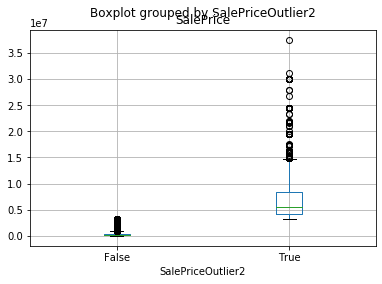

In [112]:
sales_data4.boxplot(column='SalePrice', by='SalePriceOutlier2');

In [78]:
sales_data4.loc[sales_data4['SalePriceOutlier'] == False]['SalePrice'].describe()

count    8.725000e+05
mean     3.710675e+05
std      3.411006e+05
min      1.000000e+00
25%      1.650000e+05
50%      2.774620e+05
75%      4.510000e+05
max      3.090000e+06
Name: SalePrice, dtype: float64

In [77]:
sales_data4.loc[sales_data4['SalePriceOutlier'] == True]['SalePrice'].describe()

count    8.484000e+03
mean     7.182603e+06
std      4.836212e+06
min      3.095000e+06
25%      3.864210e+06
50%      5.333535e+06
75%      8.200056e+06
max      3.750000e+07
Name: SalePrice, dtype: float64

In [64]:
test

array([ 5518000, 13014683,  5400000,  3300000,  3250000,  6555000,
        8200056,  9796485,  5640000,  9750000, 11000000,  6100000,
        7250000,  3100000,  9275000,  4926500,  3374000,  3212000,
        3610000, 15951426,  6200000,  3960000,  9364347,  3612833,
        9565000,  3175000,  4050000,  4110000,  5165000,  3336856,
       16245000,  3240000,  4188000,  5000000,  4000000,  4352000,
        8973700,  6885000,  3542610,  4250000,  4196000,  3835000,
        6366030, 12384000,  3526093,  3520000,  4750000,  4940000,
        3390000,  4484500,  5830000,  4480000,  3657000,  3850000,
        3312609,  3510000,  6725550,  4025000,  4300000,  3717600,
        3650000,  7740000,  3150000,  4784000,  3388240, 24500000,
       10149957,  3400000,  3107773, 14014390,  4700000,  6950000,
        7750000,  5581824,  4236000,  6000000,  4721621,  5500000,
        5490000, 11606784,  8310000,  4303894,  3319500,  3732749,
        3680000,  4292000,  3145000,  3495000,  5470000,  3670